### 凡人修仙传精细分析<br>
用不同的参数来输出不同的模型<br><br>
1 skip-gram<br><br>
2 cbow<br><br>
3 cbow-小窗口-小词频

- word2vec模型参数的控制十分关键，不同的参数，结果课能差距十分大！
- 想根据词频画出不同大小的点，结果很失望，因为每个词的词频都差不多，图上很不明显！

In [1]:
from gensim.models import Word2Vec
import jieba
import re
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [17]:
import numpy as np
plt.style.use('ggplot')

In [3]:
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0)

from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False

In [5]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    # 只处理500个
    tokens = tokens[:1000]
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 12)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

- 相似词做成图

In [6]:
def vision(string,num,model):
    y = model.most_similar([string],topn=num)
    label,coor = [],[]
    for i in range(len(y)):
        label.append(y[i][0])
        coor.append(model[y[i][0]])
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)   
    new_values = tsne_model.fit_transform(coor)
    
    x,y = [],[]
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(16, 12))     
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(label[i],
                xy=(x[i], y[i]),
                xytext=(5, 2),
                textcoords='offset points',
                ha='right',
                va='bottom')
    string = '`'+ string + '`' + ' Top' + str(num) + '相似词'
    plt.title(label=string,fontsize=20)

- 相似词按词频大小作图

In [18]:
def new_vision(string,num,model):
    y = model.most_similar([string],topn=num)
    label,coor = [],[]
    for i in range(len(y)):
        label.append(y[i][0])
        coor.append(model[y[i][0]])
    
    frequences = [words_count[word] for word in label]
    m,n = max(frequences),min(frequences)
    mean = np.mean(frequences)
    fre = [((fre-mean)/(m-n))*1000 for fre in frequences]
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)   
    new_values = tsne_model.fit_transform(coor)
    
    x,y = [],[]
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(16, 12))
    
    nn = num/10
    area = np.pi * (0.5 * 1)**2
    are = [i * area for i in fre]
    cValue = ['r','y','g','b','r','y','g','b','r','y'] * int(nn)
    
    for i in range(len(x)):
        plt.scatter(x[i],y[i],c=cValue[i],alpha=0.5,s=are)
        plt.annotate(label[i],
                xy=(x[i], y[i]),
                xytext=(5, 2),
                textcoords='offset points',
                ha='right',
                va='bottom')
    string = '`'+ string + '`' + ' Top' + str(num) + '相似词'
    plt.title(label=string,fontsize=20)

In [8]:
def process(data):
    m1 = map(lambda s : s.strip("\u3000\u3000|\n"),data)
    m2 = map(lambda s : s.replace("\u3000",""),m1)
    cut_words = map(lambda s : list(jieba.cut(s)),m2)
    return list(cut_words)

- 分词清理数据

In [9]:
jieba.load_userdict("user_dict.txt")
data = open("2.txt",encoding="gb2312",errors="ignore").readlines()

Building prefix dict from the default dictionary ...
2019-07-31 15:08:11,958 : DEBUG : Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\13974\AppData\Local\Temp\jieba.cache
2019-07-31 15:08:11,962 : DEBUG : Loading model from cache C:\Users\13974\AppData\Local\Temp\jieba.cache
Loading model cost 0.762 seconds.
2019-07-31 15:08:12,722 : DEBUG : Loading model cost 0.762 seconds.
Prefix dict has been built succesfully.
2019-07-31 15:08:12,723 : DEBUG : Prefix dict has been built succesfully.


In [10]:
data[:10]

['==========================================================\n',
 '更多精校小说尽在知轩藏书下载：http://www.zxcs.me/\n',
 '==========================================================\n',
 '凡人修仙传 作者：忘语\n',
 '\n',
 '内容简介：\n',
 '\u3000\u3000一个普通的山村穷小子，韩立，在自己叔叔的引荐下，走出山野，跨入了一个江湖小门派，成为了一名长老的记名弟子，一个阴谋，让他懵懵懂懂的开始修仙，从此，飘渺无踪的仙路出现在了他的脚下，破解门派覆灭之噩，破解自身的困局，他冲出江湖，进入修仙界。\n',
 '\u3000\u3000仙缘难定，他以这样的身份，如何在门派中立足？又如何以平庸的资质，进入到修仙强者的行列？\n',
 '\u3000\u3000一个神奇的小绿瓶，让他拥有了一丝变强的机会，通过不断发掘它的潜力，再加上自身努力，以及天性的谨慎，他战战兢兢的在残酷的修真界生存下来，抓住每一次机会提升自己的实力。\n',
 '\u3000\u3000大浪淘沙，终现真金，当数十年数百数千年之后，这个普通的小子却如同宝剑出鞘，和仙宗仙师并列于山海内外！曾经的山野穷小子，今日纵横三界的韩老魔，一切，皆有可能！\n']

In [11]:
words = process(data)

In [12]:
words[12]

['第一卷', ' ', '七玄门', '风云']

- 构建词频字典

In [13]:
from collections import Counter

In [14]:
one_sentence_list = []
for word in words:
    one_sentence_list += word
words_count = Counter(one_sentence_list)

In [24]:
len(words_count)

77568

In [27]:
words_count.most_common(3000)[2980:]

[('四处', 148),
 ('修', 148),
 ('青石', 148),
 ('用力', 148),
 ('躲避', 148),
 ('模糊不清', 148),
 ('高人', 148),
 ('刃', 148),
 ('一合', 148),
 ('角落', 148),
 ('鬼脸', 148),
 ('夫妇', 148),
 ('铺天盖地', 148),
 ('数里', 148),
 ('汹汹', 148),
 ('主持', 148),
 ('四大', 148),
 ('缠住', 148),
 ('田', 148),
 ('金光灿灿', 148)]

- 加载模型<br><br>
1 skip-gram<br><br>
2 cbow<br><br>
3 cbow-小窗口-小词频

In [16]:
model1 = Word2Vec.load('model1')
model2 = Word2Vec.load('model2')
model3 = Word2Vec.load('model3')

2019-07-31 15:12:49,109 : INFO : loading Word2Vec object from model1
2019-07-31 15:12:49,707 : INFO : loading trainables recursively from model1.trainables.* with mmap=None
2019-07-31 15:12:49,708 : INFO : loading vocabulary recursively from model1.vocabulary.* with mmap=None
2019-07-31 15:12:49,708 : INFO : loading wv recursively from model1.wv.* with mmap=None
2019-07-31 15:12:49,709 : INFO : setting ignored attribute vectors_norm to None
2019-07-31 15:12:49,710 : INFO : setting ignored attribute cum_table to None
2019-07-31 15:12:49,711 : INFO : loaded model1
2019-07-31 15:12:49,788 : INFO : loading Word2Vec object from model2
2019-07-31 15:12:49,983 : INFO : loading trainables recursively from model2.trainables.* with mmap=None
2019-07-31 15:12:49,984 : INFO : loading vocabulary recursively from model2.vocabulary.* with mmap=None
2019-07-31 15:12:49,985 : INFO : loading wv recursively from model2.wv.* with mmap=None
2019-07-31 15:12:49,985 : INFO : setting ignored attribute vectors

- 词向量对比

In [28]:
model1['韩立']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 5.1223564e-01,  3.2800503e-02,  2.8379264e-01, -2.1687615e-01,
       -5.8708061e-02, -2.6791924e-01,  3.3444241e-01,  2.2708543e-01,
       -6.6644055e-01,  2.2268996e-01, -4.4342300e-01,  4.4577876e-01,
        1.7698154e-01,  3.2607007e-01, -2.3428339e-01, -2.4768929e-01,
        2.4381424e-01, -4.0653476e-01,  4.2644957e-01, -2.1076977e-01,
        6.4839959e-01, -2.5294039e-01,  3.9624500e-01, -1.5323190e-01,
       -3.3536014e-01,  4.3664500e-01, -9.6799515e-02,  5.7013541e-01,
        1.4308675e-01,  2.8808538e-02, -3.5010487e-01,  1.4955774e-01,
       -9.8065376e-02,  3.9062232e-01, -1.1949355e-02, -4.3892473e-01,
       -3.6374369e-01, -6.5091091e-01, -4.6172228e-01,  6.4379728e-04,
       -9.6663810e-02,  8.2563818e-02, -3.1958470e-01,  4.8569921e-01,
        6.5751016e-02, -1.7646939e-01,  1.3323273e-01, -5.6491261e-03,
       -5.5874355e-02, -2.9559848e-01], dtype=float32)

In [29]:
model2['韩立']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.7016999 ,  1.1567688 ,  0.6720677 , -3.1828966 ,  0.38286123,
       -0.22579338,  0.05061605, -0.89518905,  0.74029315,  0.06158993,
       -1.3457134 ,  1.5132315 , -0.8891232 ,  1.7917013 , -0.46668795,
       -2.1073778 ,  0.5244059 , -0.15842782,  1.6773645 ,  2.5020592 ,
        2.5826921 ,  1.0327551 ,  1.930829  ,  0.97562695,  0.82196087,
       -2.632518  , -1.0539721 , -1.9963012 , -1.6029865 , -0.38902038,
       -0.19778937, -1.6274173 , -0.47135904,  2.313253  , -0.833163  ,
        2.067549  , -1.1559128 ,  0.58581966, -1.3038439 , -1.0405579 ,
       -0.9649466 , -0.94783664, -1.2551237 , -1.3937728 ,  1.5525614 ,
       -0.4403746 ,  1.0955791 , -0.40478817, -2.3457265 ,  0.02049727],
      dtype=float32)

In [30]:
model3['韩立']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 1.0543115 ,  0.11001113,  1.9136595 , -0.27456355, -0.52768743,
       -1.7883036 , -0.7606989 , -0.73440856,  1.365998  ,  1.4743413 ,
       -1.4837396 ,  1.2484496 , -1.771623  ,  0.6741095 ,  1.3324969 ,
       -3.0211678 , -0.42927077,  0.18396598,  1.1195652 ,  1.2777293 ,
        0.5372941 ,  0.73638225,  1.3309236 , -0.64419615,  1.4710608 ,
        0.96842206,  0.0527628 , -1.1065055 , -1.9318103 , -0.9801302 ,
        3.6320012 ,  0.23558906,  0.8444767 , -0.8346127 , -1.4657322 ,
        1.7898684 ,  3.667281  ,  0.23512974, -2.8849573 , -0.7448422 ,
        1.6004677 , -1.5863167 ,  0.9734373 , -1.1253353 ,  0.51980066,
       -1.5700604 , -0.61433643, -2.425912  ,  2.095338  ,  1.3103167 ,
       -1.4849489 ,  0.6708549 , -0.23298582,  0.47237042,  0.7199216 ,
        3.2792776 ,  0.6366601 ,  0.9664885 , -1.9891443 ,  1.7557025 ,
        2.3942926 ,  1.7750477 , -2.282812  ,  3.3367393 ,  2.2665415 ,
       -0.9397626 ,  2.0949755 , -0.42157266,  1.6807812 ,  2.76

- 相似词对比

In [31]:
model1.most_similar(['功法'],topn=20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2019-07-31 15:18:34,130 : INFO : precomputing L2-norms of word weight vectors


[('所修', 0.8711347579956055),
 ('主修', 0.8650510311126709),
 ('魔功', 0.8552155494689941),
 ('秘术', 0.8529682159423828),
 ('修炼', 0.849860668182373),
 ('锻体', 0.8456038236618042),
 ('佛门', 0.8334051966667175),
 ('道家', 0.8297052383422852),
 ('体质', 0.8285782337188721),
 ('王决', 0.8226219415664673),
 ('修习', 0.8156152963638306),
 ('兼修', 0.8114650845527649),
 ('天赋', 0.8093072175979614),
 ('改修', 0.8092350959777832),
 ('鬼道', 0.8092211484909058),
 ('相配合', 0.8083221912384033),
 ('相配', 0.8078724145889282),
 ('傀儡术', 0.8074150085449219),
 ('多种', 0.8061742782592773),
 ('炼神术', 0.8024624586105347)]

In [32]:
model2.most_similar(['功法'],topn=20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2019-07-31 15:18:36,327 : INFO : precomputing L2-norms of word weight vectors


[('秘术', 0.8478899002075195),
 ('体质', 0.8338401317596436),
 ('魔功', 0.803093671798706),
 ('手段', 0.7980362176895142),
 ('功效', 0.777010440826416),
 ('方法', 0.7699338793754578),
 ('法术', 0.7645589113235474),
 ('灵丹', 0.7608372569084167),
 ('之术', 0.7536781430244446),
 ('真血', 0.7531458139419556),
 ('口诀', 0.7493908405303955),
 ('天赋', 0.7469257712364197),
 ('神通', 0.7458941340446472),
 ('杀手锏', 0.7446318864822388),
 ('法门', 0.7439333200454712),
 ('奇效', 0.7414485216140747),
 ('灵根', 0.7405396103858948),
 ('傀儡术', 0.7368028163909912),
 ('炼体', 0.7333676815032959),
 ('通天灵宝', 0.7315120697021484)]

In [33]:
model3.most_similar(['功法'],topn=20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2019-07-31 15:18:40,237 : INFO : precomputing L2-norms of word weight vectors


[('魔功', 0.8131148815155029),
 ('体质', 0.8033286333084106),
 ('秘术', 0.7842789888381958),
 ('修炼', 0.765965461730957),
 ('口诀', 0.7542719841003418),
 ('天赋', 0.7433940768241882),
 ('基础', 0.7347937822341919),
 ('之术', 0.7301256656646729),
 ('炼神术', 0.7090953588485718),
 ('主修', 0.7057644128799438),
 ('青元剑诀', 0.7048282623291016),
 ('灵根', 0.7027115821838379),
 ('惊蛰', 0.70094895362854),
 ('大衍诀', 0.6975128650665283),
 ('术', 0.6893006563186646),
 ('驱虫', 0.6810478568077087),
 ('法门', 0.6797516345977783),
 ('手法', 0.6790029406547546),
 ('佛门', 0.6770175695419312),
 ('秘法', 0.6760212779045105)]

- 同义词对比

In [34]:
model1.similarity('韩立','南宫婉')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.6386646

In [35]:
model2.similarity('韩立','南宫婉')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.8063517

In [36]:
model3.similarity('韩立','南宫婉')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.5401088

- 可视化对比

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


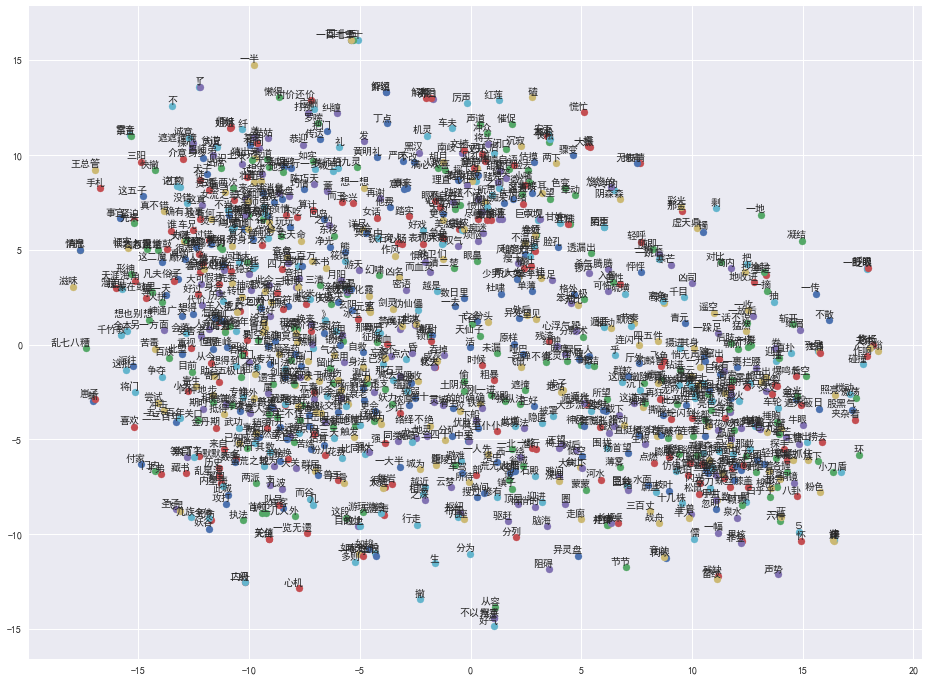

In [26]:
tsne_plot(model1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


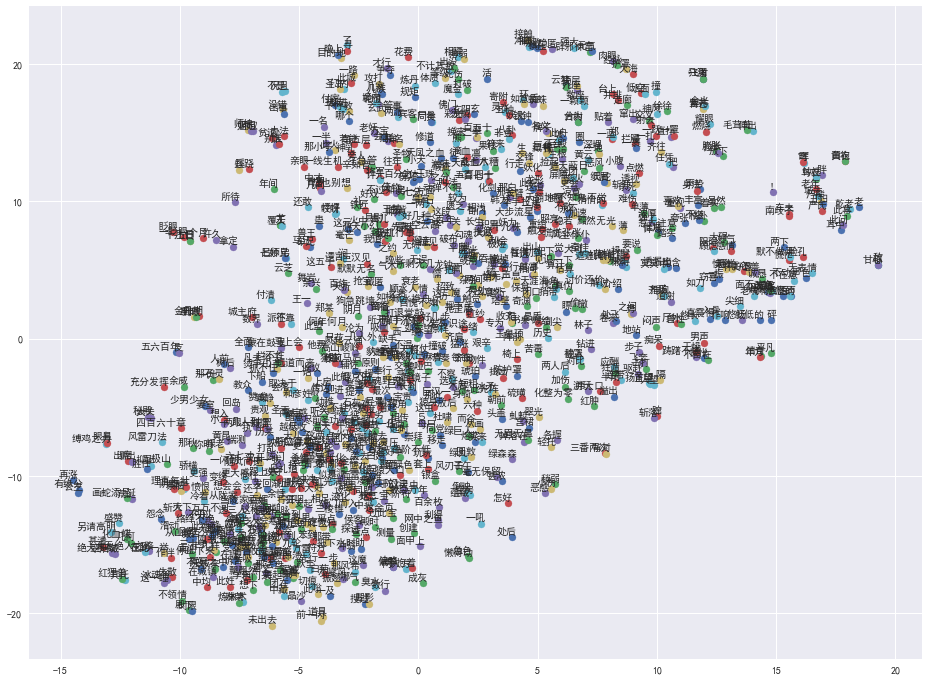

In [28]:
tsne_plot(model2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


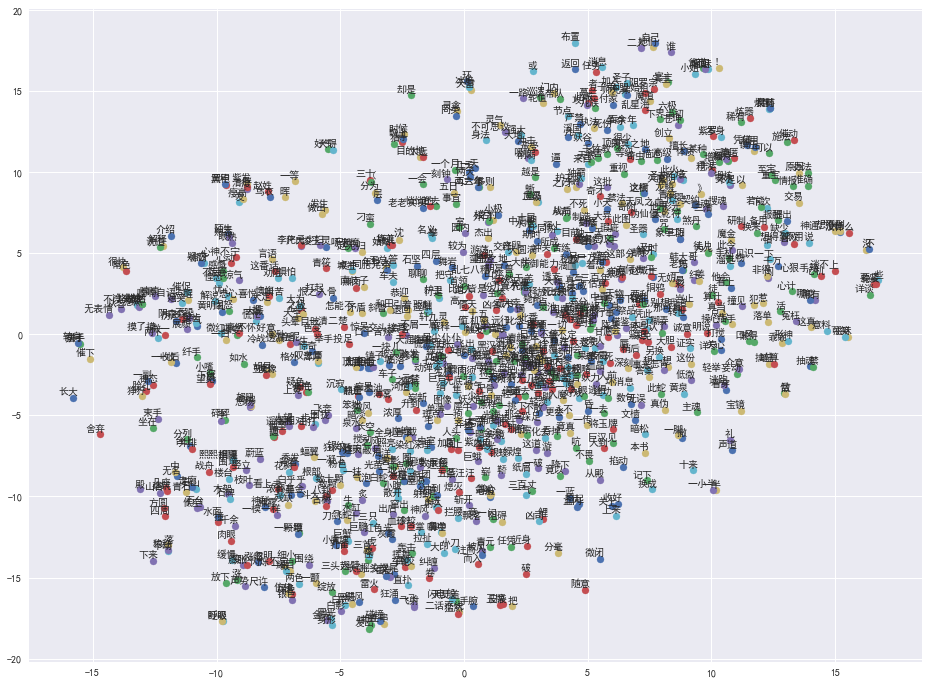

In [30]:
tsne_plot(model3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


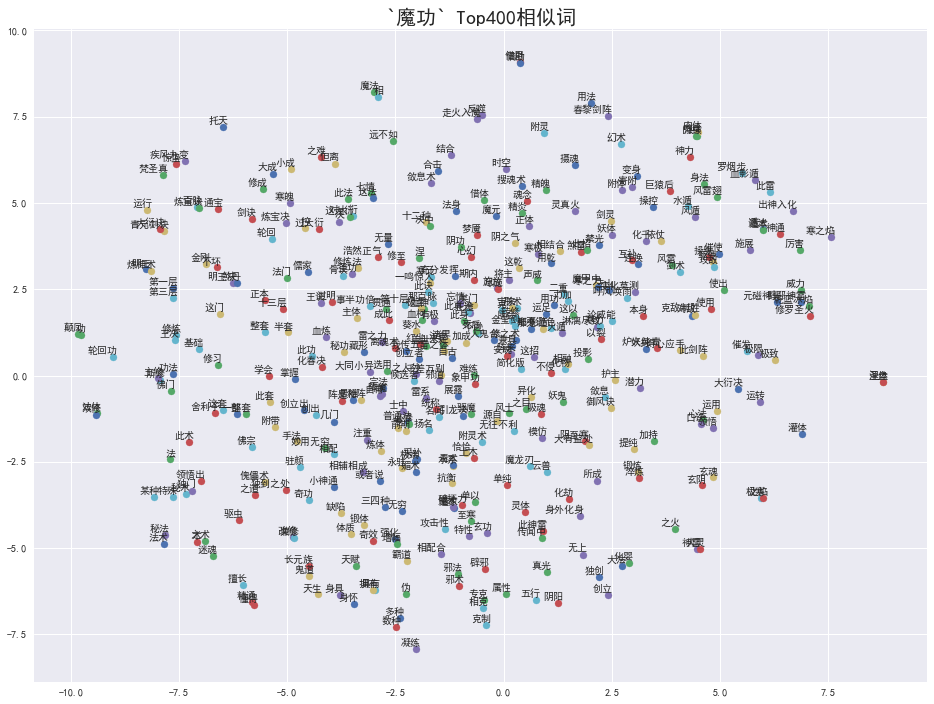

In [32]:
vision('魔功',400,model1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


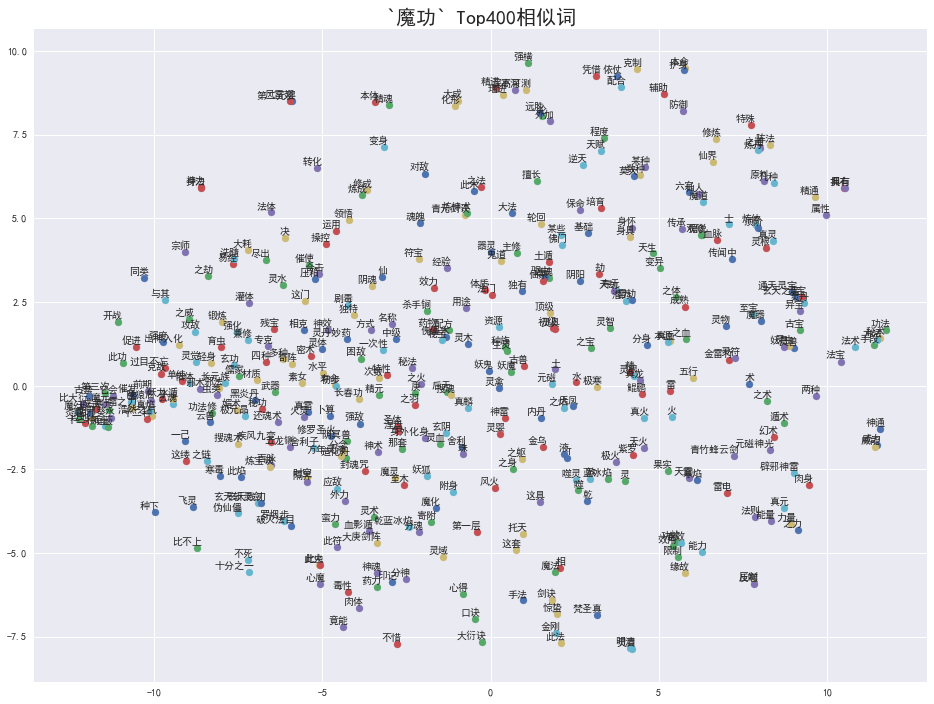

In [33]:
vision('魔功',400,model2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


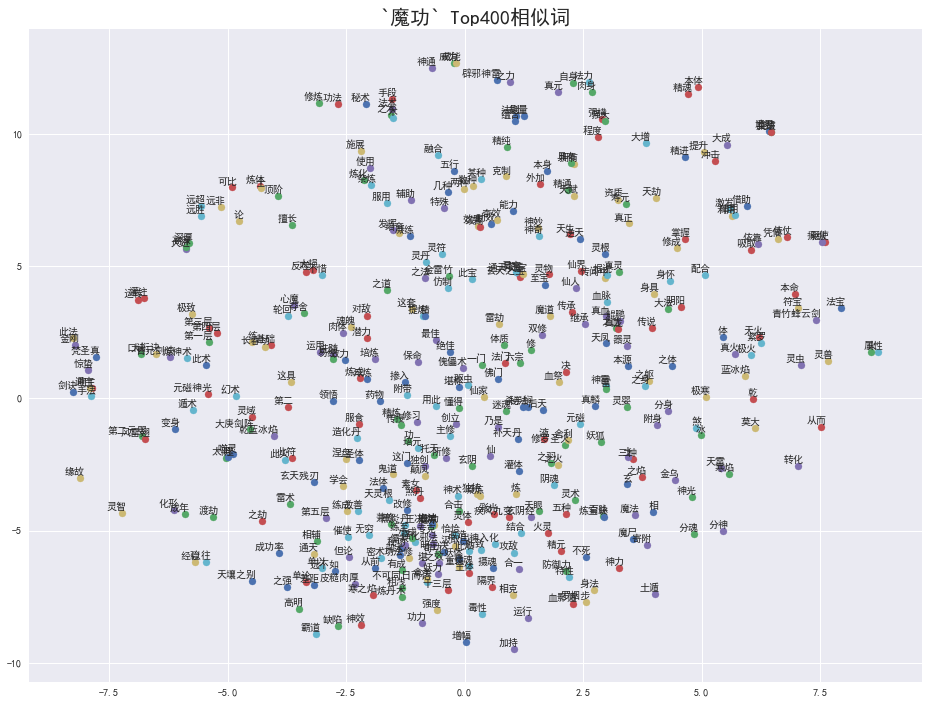

In [34]:
vision('魔功',400,model3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\13974\AppData\Roaming\Python\Python37\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


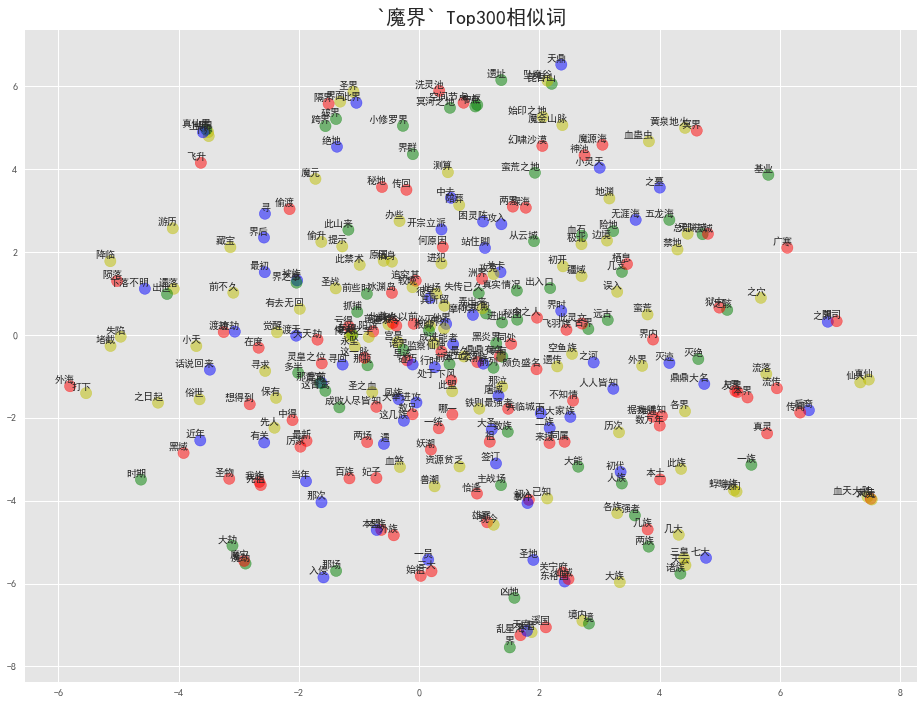

In [41]:
new_vision('魔界',300,model1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\13974\AppData\Roaming\Python\Python37\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


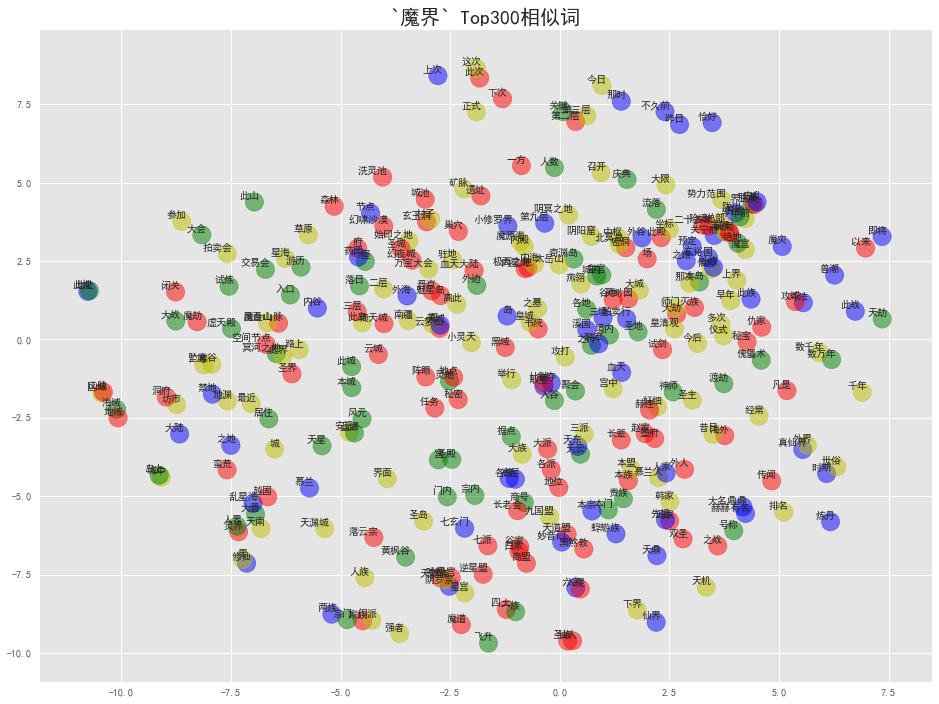

In [39]:
new_vision('魔界',300,model2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\13974\AppData\Roaming\Python\Python37\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


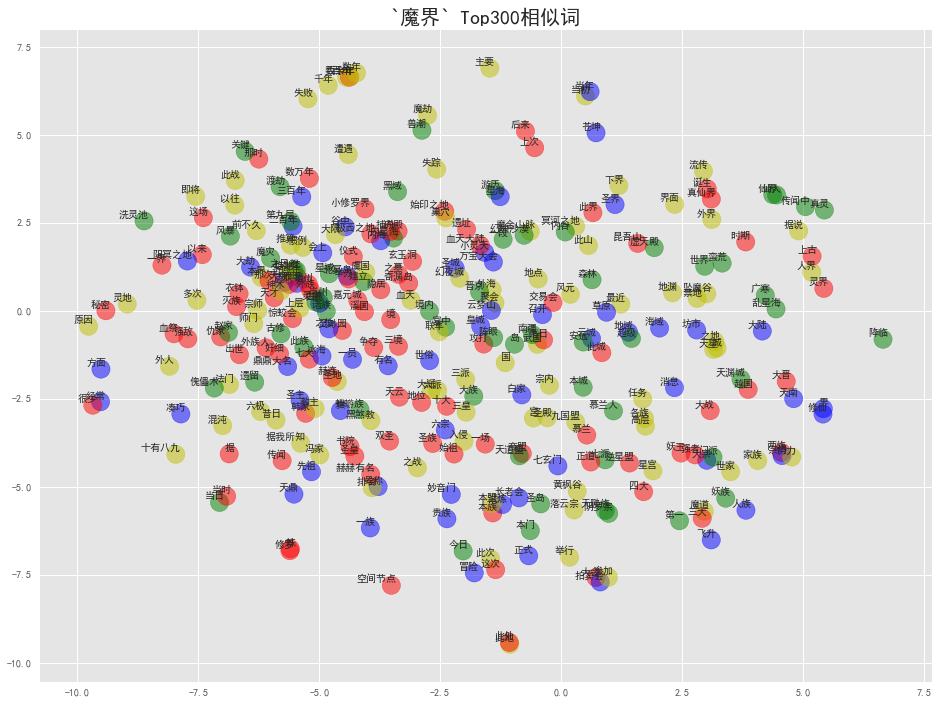

In [40]:
new_vision('魔界',300,model3)